In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
from frites import set_mpl_style
set_mpl_style()


In [2]:
class Environment:

    def __init__(self, p, V_abs, loss):
        self.p = p
        self.V_abs = V_abs
        self.loss_func = loss

    def loss(self, V_app, V_target):
        # choose your loss here
        if self.loss_func == 'square':
            return 0.5 * (V_app - V_target)**2
        elif self.loss_func == 'exp':
            return np.exp(2*np.abs(V_app - V_target)/self.V_abs)
        else:
            return np.abs(V_app - V_target)

    def step(self, V_app):
        V_target = self.V_abs * 2 * (st.bernoulli.rvs(self.p)-0.5)
        #print(V_app, V_target, -self.loss(V_app, V_target))
        return -self.loss(V_app, V_target)

In [3]:
def policyGradient(v_target,lr,n_trials):
    V=[]
    mu=0
    sigma=1
    for i in range(n_trials):
        v_app=st.norm.rvs(loc=mu,scale=sigma)
        dv_log=(v_app-mu)/sigma**2
        mu=mu + lr* np.abs(v_target-v_app)*dv_log

        V.append(v_app)

    return V
    

In [4]:
def policyGradient2(env,lr,n_trials):
    V=[]
    mu=0
    sigma=1
    mem_rew = 0
    for i in range(n_trials):
        v_app=st.norm.rvs(loc=mu,scale=sigma)
        dv_log=(v_app-mu)/sigma**2
        rew = env.step(v_app)
        mem_rew = .9 * mem_rew + .1 * rew 
        r = rew - mem_rew
        mu=mu + lr* r * dv_log
        #print(rew-mem_rew)
        V.append(v_app)

    return V


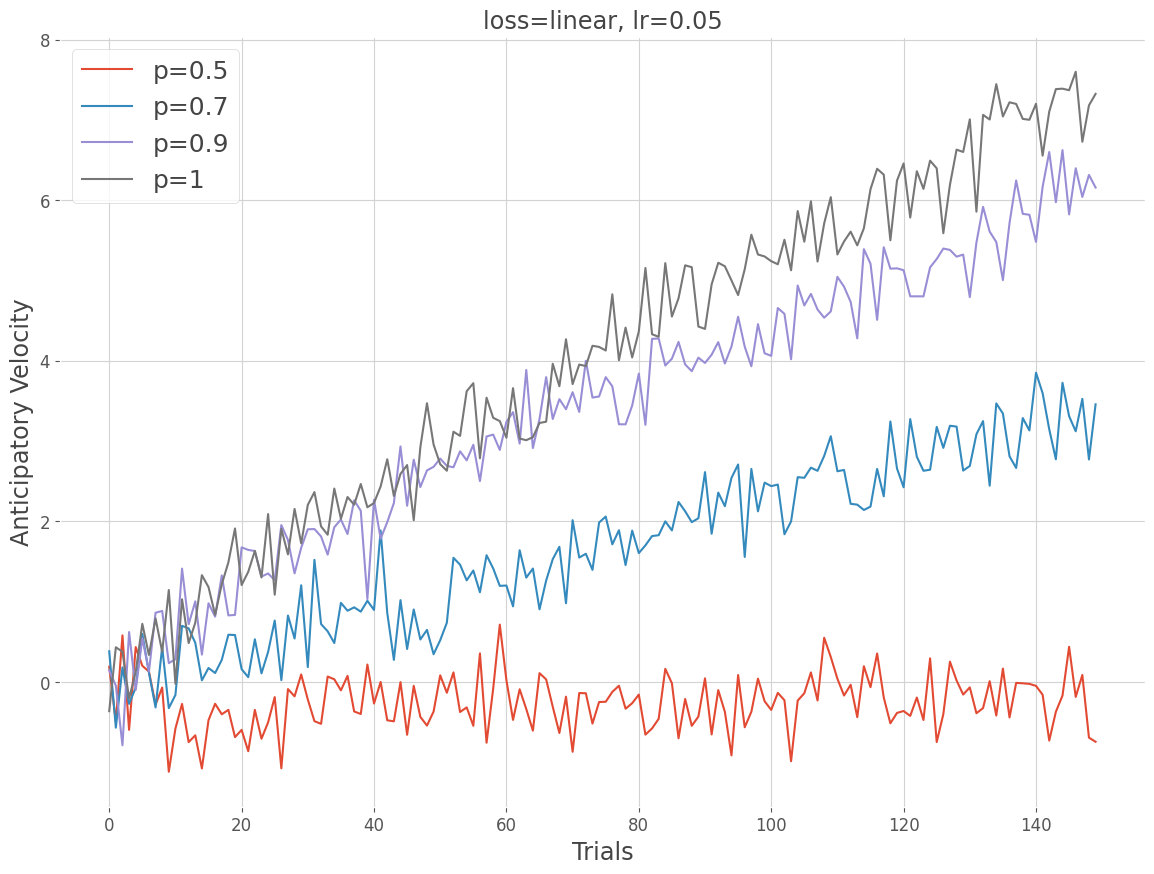

In [8]:
V_abs = 15
lr = 0.05
n_trials = 150
loss = 'linear'

for p in ( 0.5, 0.7, 0.9, 1):
    for i in range(10):
        env = Environment(p, V_abs, loss=loss)
        V_app_list = policyGradient2(env, lr, n_trials)
        if i ==0:
            V_mean = np.array(V_app_list)/10
        else:
            V_mean += np.array(V_app_list)/10
        #plt.plot(V_app_list, alpha=.5, c='gray')
    plt.plot(V_mean,label=f'p={p}')
#plt.plot([0,n_trials], [V_abs, V_abs],':r')
#plt.plot([0,n_trials], [-V_abs, -V_abs],':r')
plt.title(f'loss={loss}, lr={lr}')
plt.xlabel("Trials")
plt.ylabel("Anticipatory Velocity")
plt.legend()

#plt.ylim(-15,15)
plt.savefig('pgll')

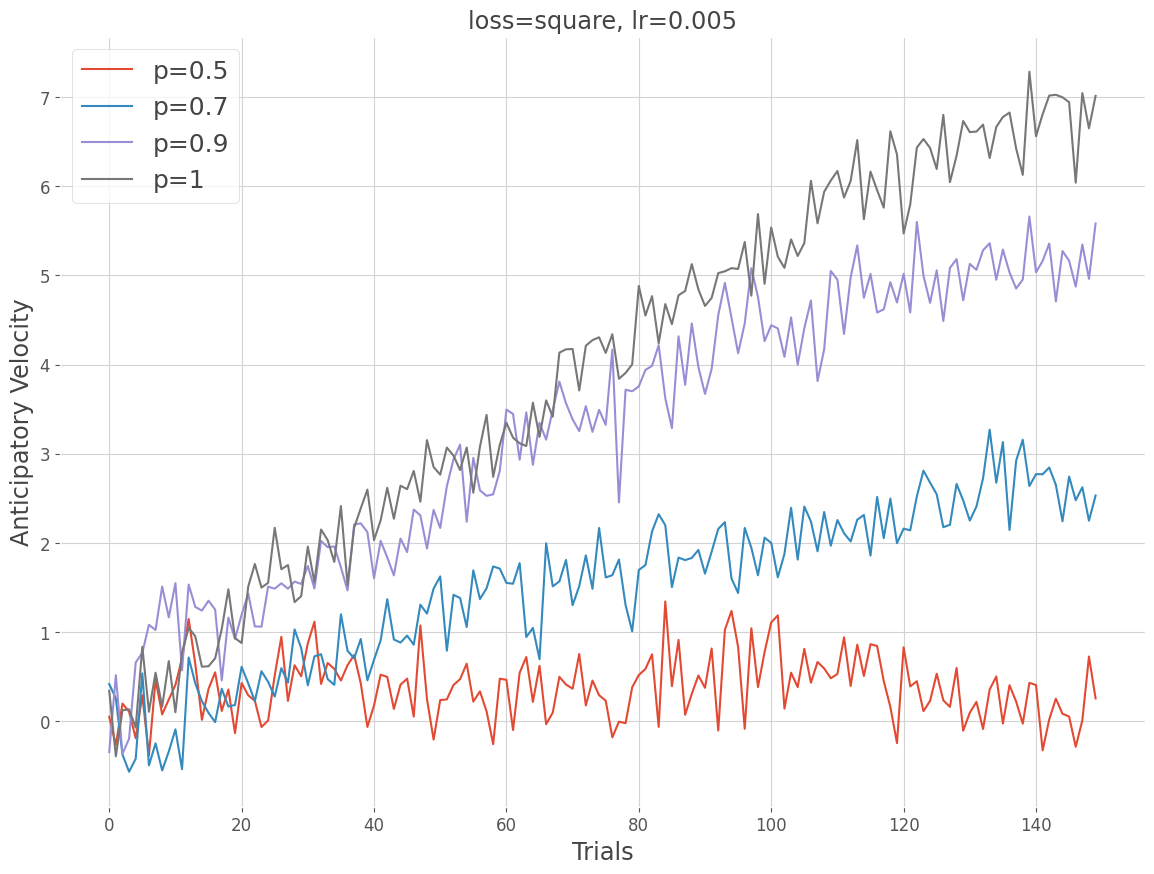

In [10]:
V_abs = 15
lr = 0.005
n_trials = 150
loss = 'square'

for p in (0.5, 0.7, 0.9, 1):
    for i in range(10):
        env = Environment(p, V_abs, loss=loss)
        V_app_list = policyGradient2(env, lr, n_trials)
        if i ==0:
            V_mean = np.array(V_app_list)/10
        else:
            V_mean += np.array(V_app_list)/10
        #plt.plot(V_app_list, alpha=.5, c='gray')
    plt.plot(V_mean,label=f'p={p}')
#plt.plot([0,n_trials], [V_abs, V_abs],':r')
#plt.plot([0,n_trials], [-V_abs, -V_abs],':r')
plt.title(f'loss={loss}, lr={lr}')
plt.xlabel("Trials")
plt.ylabel("Anticipatory Velocity")
plt.legend()
#plt.ylim(-15,15)
#plt.xlim(0,200)
plt.savefig('pgls')

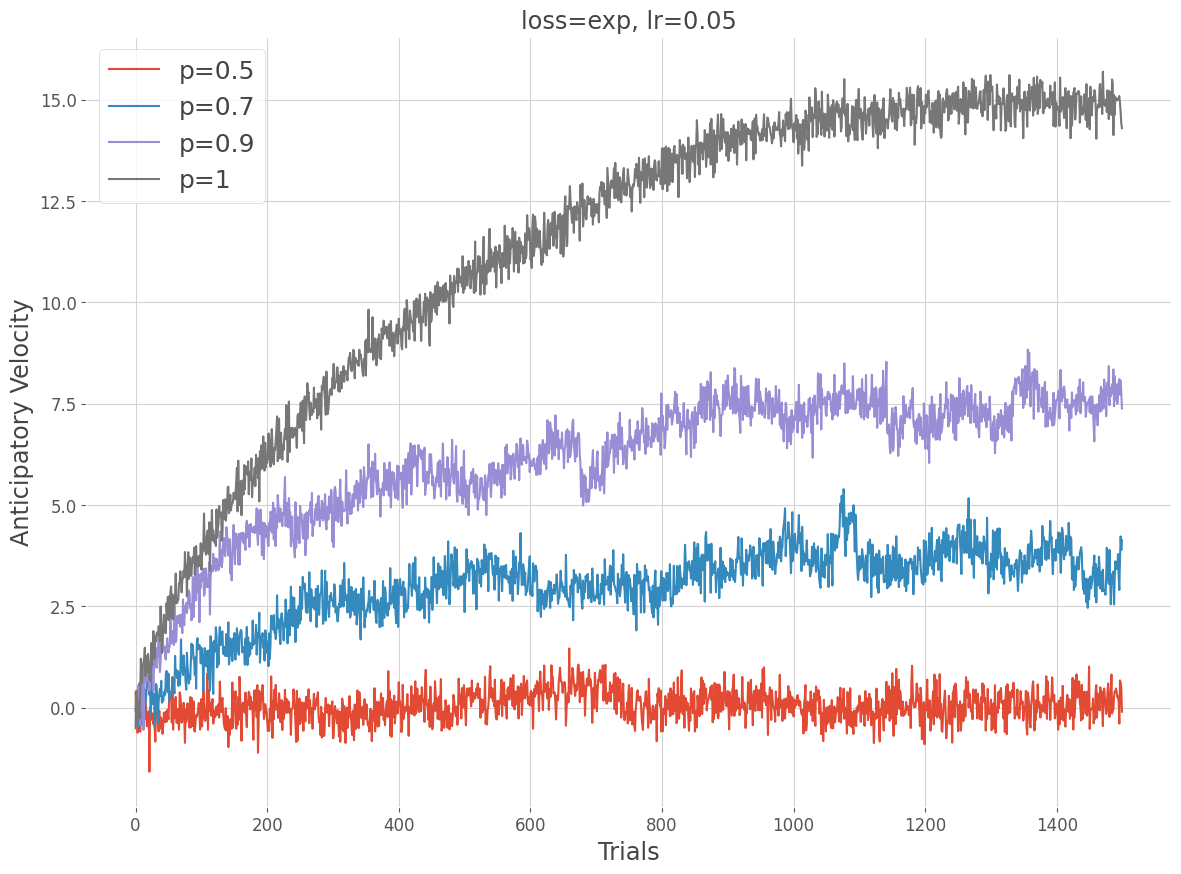

In [11]:
V_abs = 15
lr = 0.05
n_trials = 1500
loss = 'exp'

for p in (0.5, 0.7, 0.9, 1):
    for i in range(10):
        env = Environment(p, V_abs, loss=loss)
        V_app_list = policyGradient2(env, lr, n_trials)
        if i ==0:
            V_mean = np.array(V_app_list)/10
        else:
            V_mean += np.array(V_app_list)/10
        #plt.plot(V_app_list, alpha=.5, c='gray')
    plt.plot(V_mean,label=f'p={p}')
#plt.plot([0,n_trials], [V_abs, V_abs],':r')
#plt.plot([0,n_trials], [-V_abs, -V_abs],':r')
plt.title(f'loss={loss}, lr={lr}')
plt.legend()
#plt.ylim(-15,15)
plt.xlabel("Trials")
plt.ylabel("Anticipatory Velocity")
plt.savefig('pgle')